
# Rain Prediction – Weather forecasting



In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from scipy import stats

# Importing Dataset

In [42]:
df = pd.read_csv("weatherAUS.csv")

In [43]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Check Null Values

In [44]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

# Checking Dataset Information

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

## Converting the Rain today and Rain Tomorrow as they are yes/No

In [46]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

### Lets check if the dataset is unbalanced or balanced. If the data set is unbalanced, we need to either downsample the majority or oversample the minority to balance it.

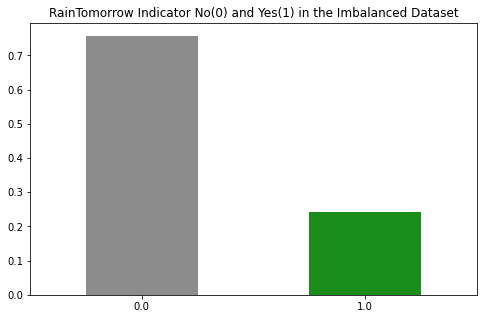

In [48]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['gray','green'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

### Observation- We can see that Rainfall is imbalanced. Lets try to balance it.

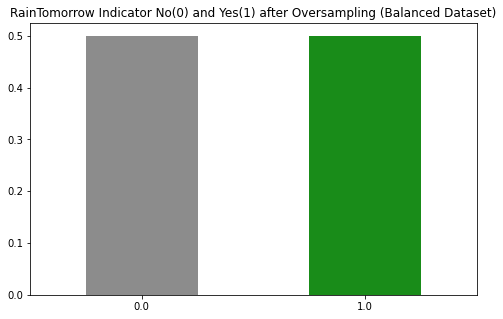

In [49]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_os = resample(yes, replace=True, n_samples=len(no), random_state=123)
os = pd.concat([no, yes_os])

fig = plt.figure(figsize = (8,5))
os.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['gray','green'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

### Now the data is dalanced so lets check the missing datas and try to handle it

In [50]:
os.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12390 entries, 0 to 6765
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12390 non-null  object 
 1   Location       12390 non-null  object 
 2   MinTemp        12284 non-null  float64
 3   MaxTemp        12336 non-null  float64
 4   Rainfall       12128 non-null  float64
 5   Evaporation    7204 non-null   float64
 6   Sunshine       6504 non-null   float64
 7   WindGustDir    10955 non-null  object 
 8   WindGustSpeed  10955 non-null  float64
 9   WindDir9am     11224 non-null  object 
 10  WindDir3pm     11949 non-null  object 
 11  WindSpeed9am   12283 non-null  float64
 12  WindSpeed3pm   12268 non-null  float64
 13  Humidity9am    12306 non-null  float64
 14  Humidity3pm    12267 non-null  float64
 15  Pressure9am    10446 non-null  float64
 16  Pressure3pm    10442 non-null  float64
 17  Cloud9am       9188 non-null   float64
 18  Cloud3p

# Checking Null values

In [51]:
os.isnull().sum()

Date                0
Location            0
MinTemp           106
MaxTemp            54
Rainfall          262
Evaporation      5186
Sunshine         5886
WindGustDir      1435
WindGustSpeed    1435
WindDir9am       1166
WindDir3pm        441
WindSpeed9am      107
WindSpeed3pm      122
Humidity9am        84
Humidity3pm       123
Pressure9am      1944
Pressure3pm      1948
Cloud9am         3202
Cloud3pm         3197
Temp9am            77
Temp3pm           111
RainToday         262
RainTomorrow        0
dtype: int64

### Handling the Null values

In [52]:
os['Date'] = os['Date'].fillna(os['Date'].mode()[0])
os['Location'] = os['Location'].fillna(os['Location'].mode()[0])
os['WindGustDir'] = os['WindGustDir'].fillna(os['WindGustDir'].mode()[0])
os['WindDir9am'] = os['WindDir9am'].fillna(os['WindDir9am'].mode()[0])
os['WindDir3pm'] = os['WindDir3pm'].fillna(os['WindDir3pm'].mode()[0])

In [53]:
os.isnull().sum()

Date                0
Location            0
MinTemp           106
MaxTemp            54
Rainfall          262
Evaporation      5186
Sunshine         5886
WindGustDir         0
WindGustSpeed    1435
WindDir9am          0
WindDir3pm          0
WindSpeed9am      107
WindSpeed3pm      122
Humidity9am        84
Humidity3pm       123
Pressure9am      1944
Pressure3pm      1948
Cloud9am         3202
Cloud3pm         3197
Temp9am            77
Temp3pm           111
RainToday         262
RainTomorrow        0
dtype: int64

In [54]:
os

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5720,2010-10-29,Melbourne,13.9,28.4,0.0,7.0,9.6,N,61.0,N,...,52.0,33.0,1013.3,1008.7,3.0,5.0,20.9,27.0,0.0,1.0
6217,2011-03-29,Brisbane,19.2,26.6,6.0,3.2,0.9,E,28.0,SSW,...,75.0,52.0,1022.3,1019.7,7.0,8.0,24.2,25.5,1.0,1.0
4725,2010-04-28,Melbourne,8.8,18.1,0.8,0.8,4.4,NW,56.0,N,...,60.0,56.0,1018.8,1015.3,7.0,7.0,12.9,18.1,0.0,1.0
4936,2010-11-25,Melbourne,19.6,23.5,23.0,10.0,0.3,N,35.0,N,...,89.0,76.0,1016.0,1016.6,7.0,8.0,19.8,19.9,1.0,1.0


In [55]:
os.shape

(12390, 23)

### Dropping the NUll values

In [56]:
os=os.dropna(axis=0)

In [57]:
os.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Observation- Since no null value is present I can continue

In [58]:
os.shape

(5779, 23)

## Plotting Scatter plot to check features vs label

## Seperating features and label

In [59]:
y= os['RainTomorrow']
x= os.drop(['RainTomorrow'], axis =1)

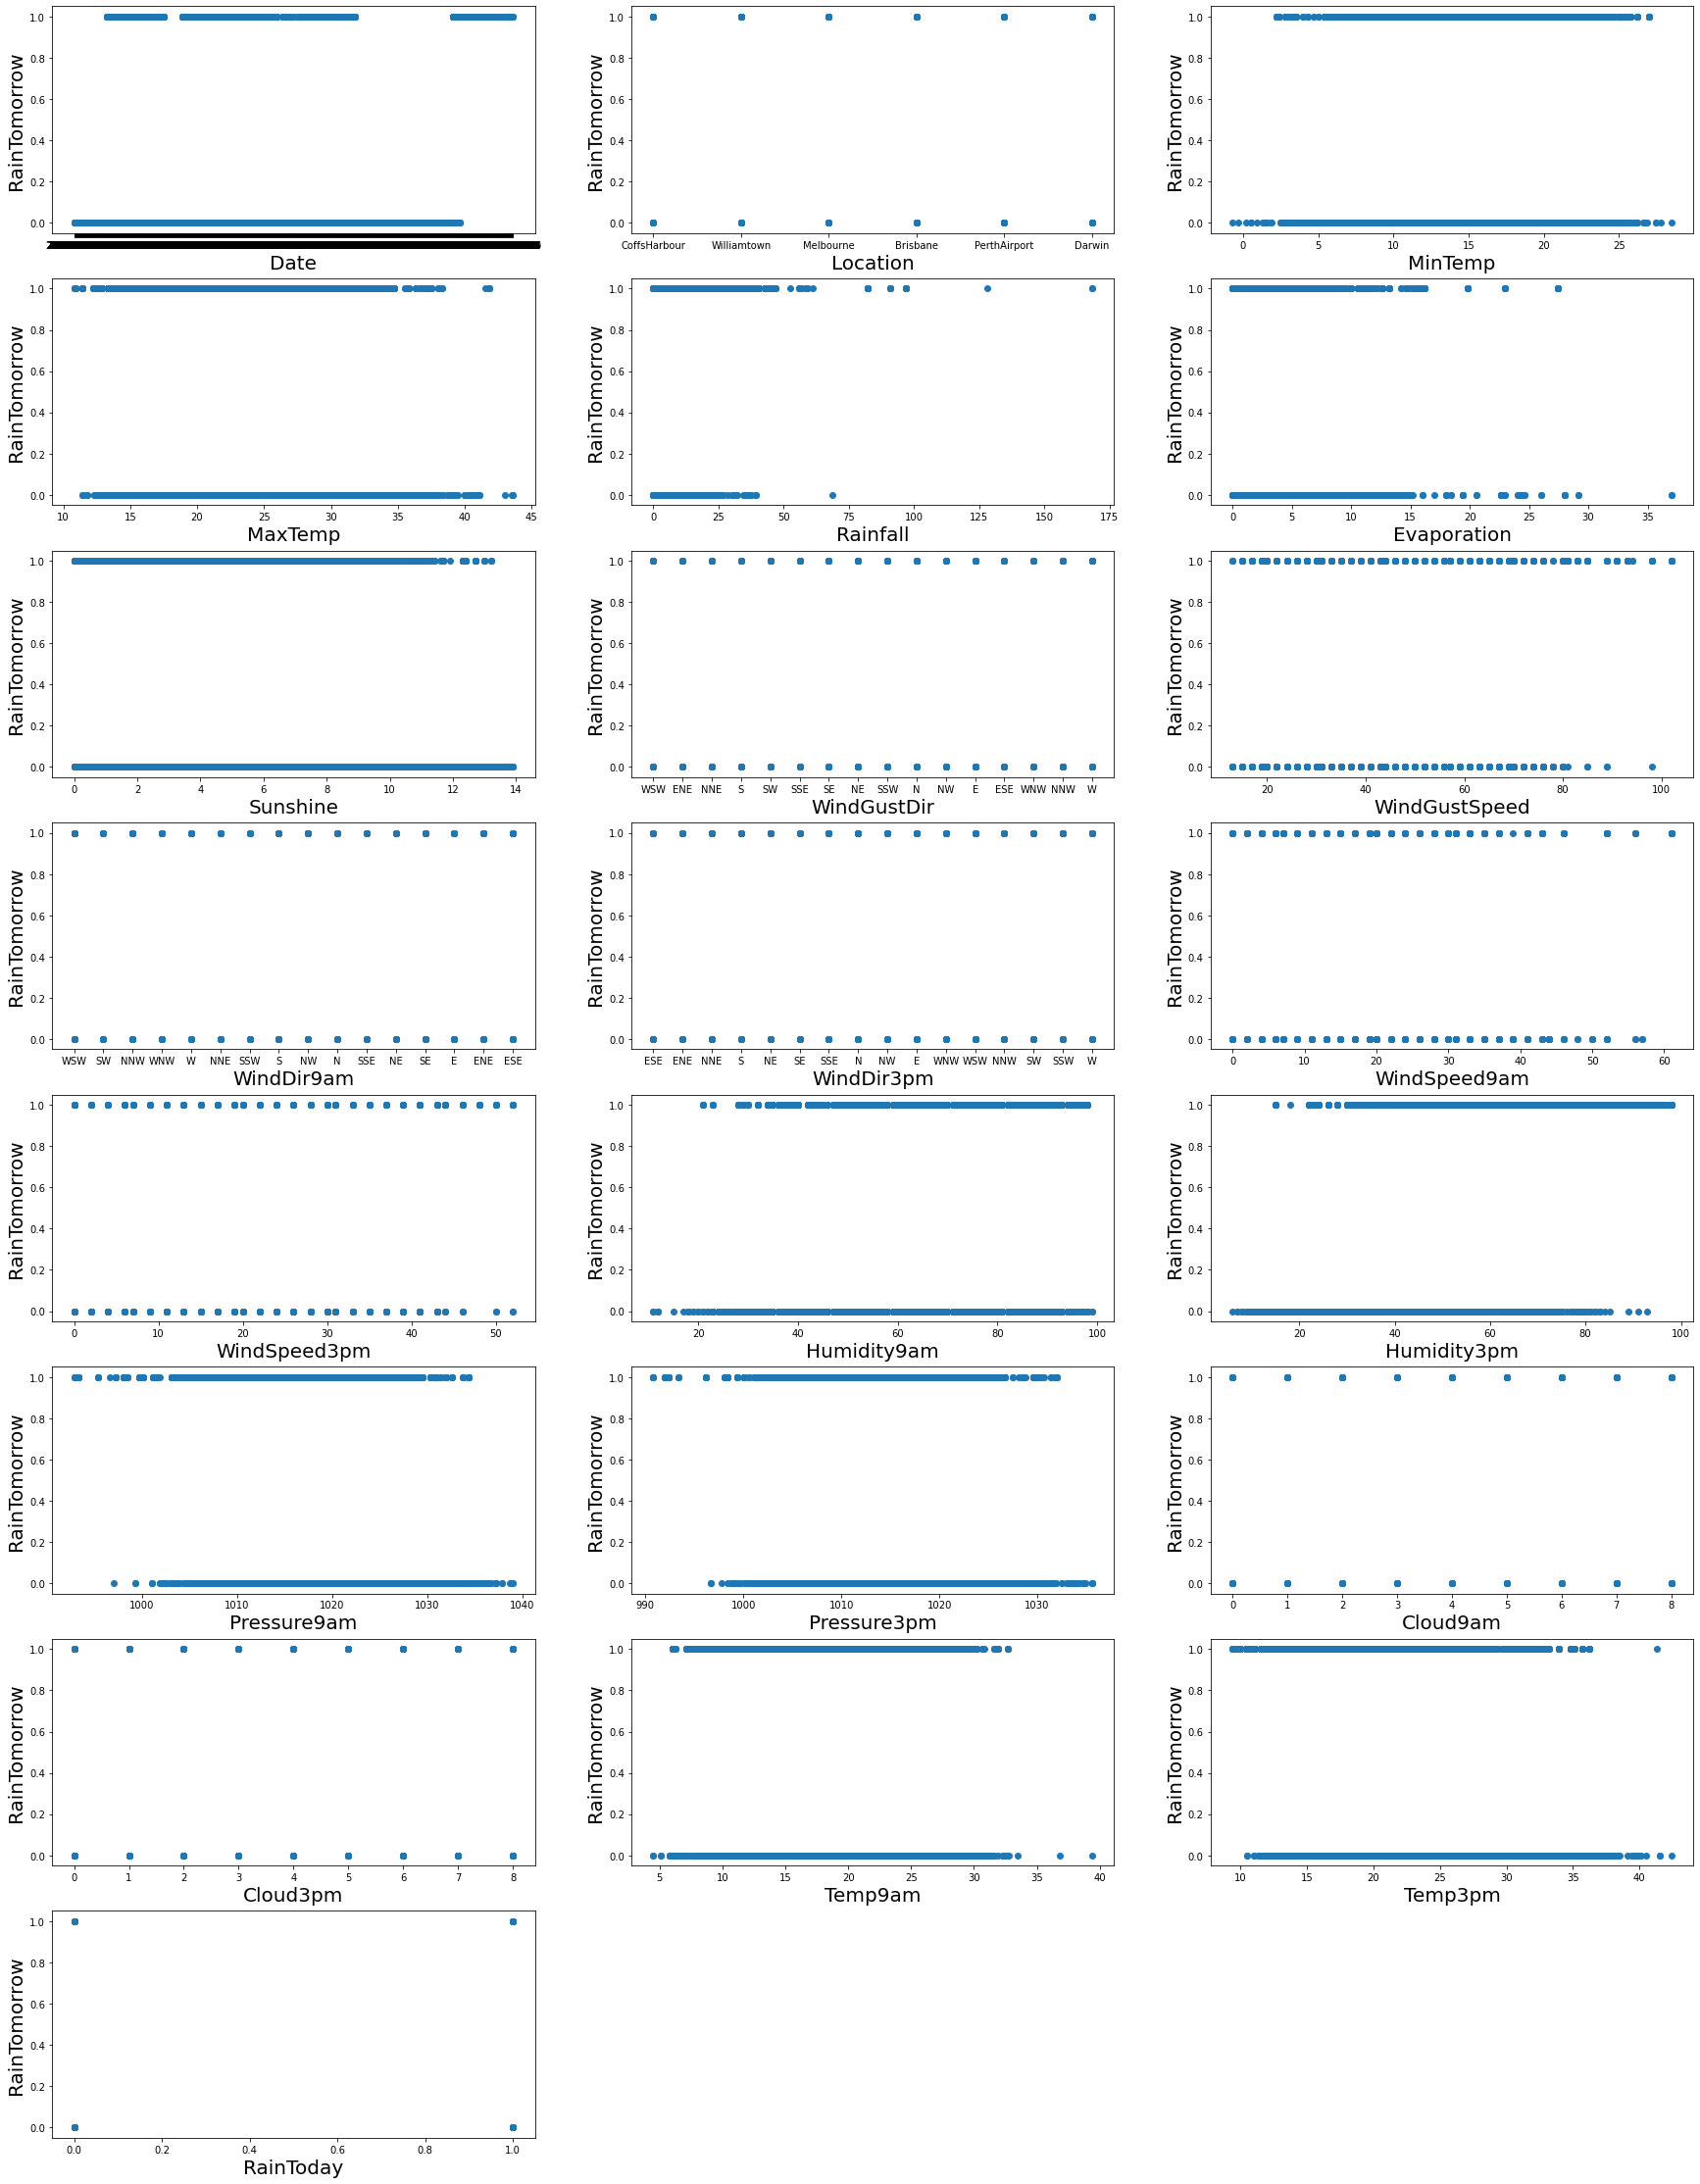

In [60]:
plt.figure(figsize =(30,40),facecolor ='white')
plotnumber = 1
for column in x:
    if plotnumber<=24:
        ax =plt.subplot(8,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('RainTomorrow',fontsize=20)
    plotnumber +=1
plt.show()

# EDA

N      749
SW     621
E      513
WSW    501
S      449
SSE    331
W      326
SSW    318
ENE    298
SE     295
NNE    274
ESE    258
NW     226
WNW    222
NE     213
NNW    185
Name: WindGustDir, dtype: int64


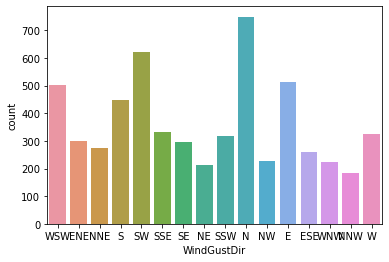

In [61]:
ax = sns.countplot(x="WindGustDir",data=os)
print(os["WindGustDir"].value_counts())

### Observation- Mostly wind gust direction is from North and least is from North-West

Melbourne       1757
PerthAirport    1723
CoffsHarbour     905
Brisbane         784
Darwin           327
Williamtown      283
Name: Location, dtype: int64


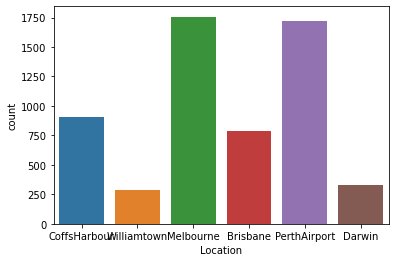

In [62]:
ax = sns.countplot(x="Location",data=os)
print(os["Location"].value_counts())

### Observation- Melbourne has highest location count and Williamtown has least

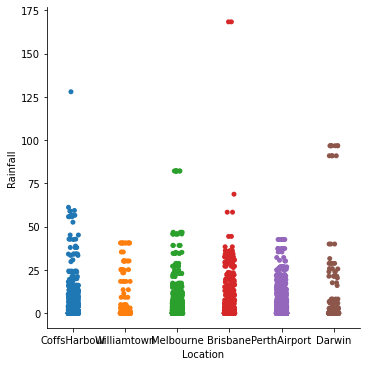

In [63]:
sns.catplot(x="Location", y= "Rainfall", data=os)

### Observation- Highest rainfall has happened at Brisbane

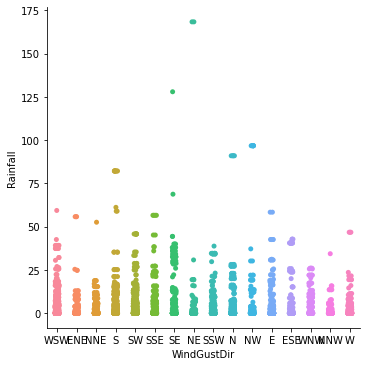

In [64]:
sns.catplot(x="WindGustDir", y= "Rainfall", data=os)

### Observation- Wind Gust direction from Northeast cause the highest rainfall

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'CoffsHarbour'),
  Text(1, 0, 'Williamtown'),
  Text(2, 0, 'Melbourne'),
  Text(3, 0, 'Brisbane'),
  Text(4, 0, 'PerthAirport'),
  Text(5, 0, 'Darwin')])

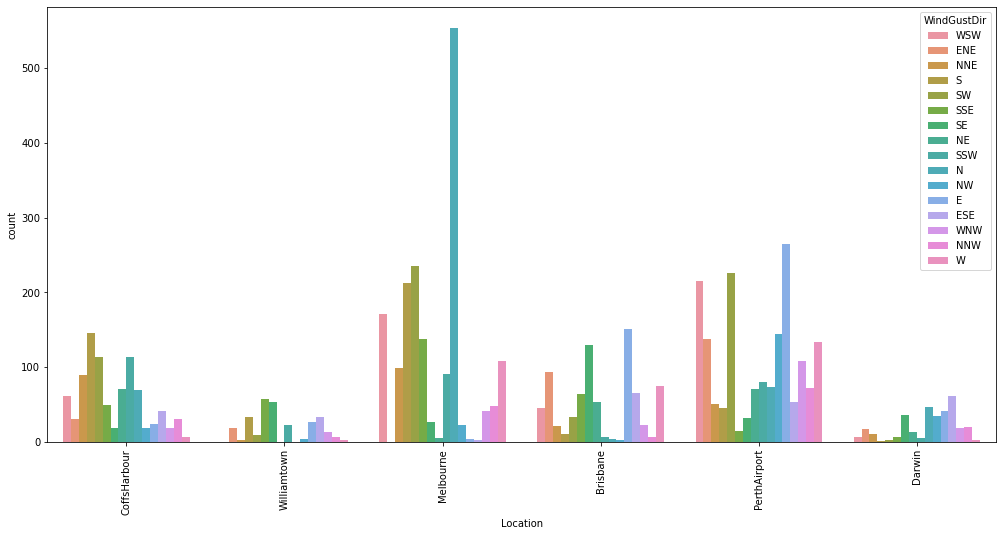

In [65]:
plt.figure(figsize=(17,8))
sns.countplot(x=os['Location'],hue=os['WindGustDir'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

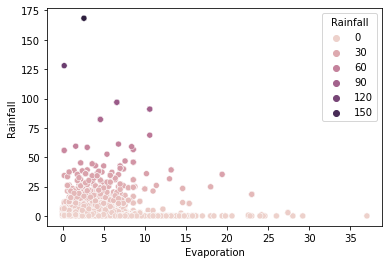

In [66]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
sns.scatterplot(x='Evaporation', y='Rainfall', hue='Rainfall', data=os)


- Evaporation increasing with rainfall decreasing
- Most rainfall is hapening when Evaporation is between 0 and 10


<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

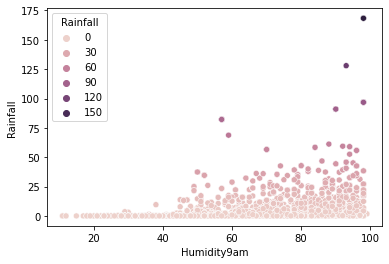

In [67]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
sns.scatterplot(x='Humidity9am', y='Rainfall', hue='Rainfall', data=os)

### Observation- When Humidity is increasing most likely to rain

<AxesSubplot:xlabel='Cloud9am', ylabel='Rainfall'>

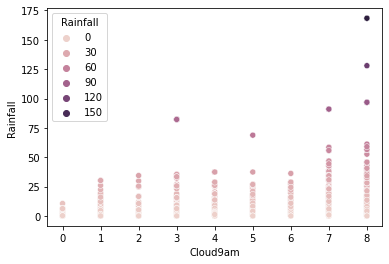

In [68]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
sns.scatterplot(x='Cloud9am', y='Rainfall', hue='Rainfall', data=os)

### Observation- The more the cloud it is more likely to rain

<AxesSubplot:xlabel='RainTomorrow', ylabel='Rainfall'>

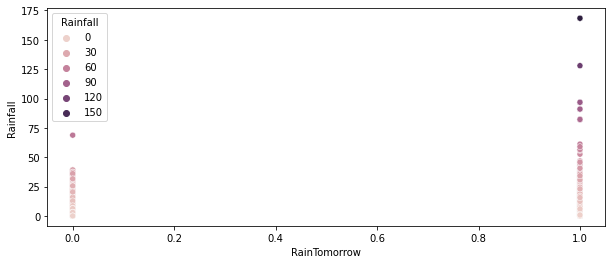

In [69]:
fig, axes = plt.subplots(1, 1, figsize=(10, 4))
sns.scatterplot(x='RainTomorrow', y='Rainfall', hue='Rainfall', data=os)

### Observation- Of today rains most likely tomorrow will also rain

# Label Encoder to convert the dataset to numerical

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [71]:
for col in os.columns:
    if os[col].dtypes == 'object':
        os[col] = le.fit_transform(os[col])

In [72]:
os.dtypes

Date               int32
Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

In [73]:
os.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
909,2,1,16.5,25.5,16.8,2.8,6.1,15,19.0,15,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1.0,0.0
910,3,1,18.5,26.9,0.0,3.2,11.0,1,30.0,12,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0.0,0.0
912,5,1,20.1,29.4,3.2,3.8,7.1,5,46.0,6,...,90.0,68.0,1012.9,1008.5,6.0,2.0,22.0,27.2,1.0,0.0
914,7,1,16.4,25.2,1.4,1.6,6.7,8,33.0,15,...,82.0,65.0,1012.0,1011.2,6.0,4.0,21.4,23.9,1.0,0.0
915,8,1,19.7,25.9,0.0,4.4,6.4,12,30.0,12,...,73.0,64.0,1017.9,1016.5,6.0,5.0,21.2,24.6,0.0,0.0


# Normal Distribution

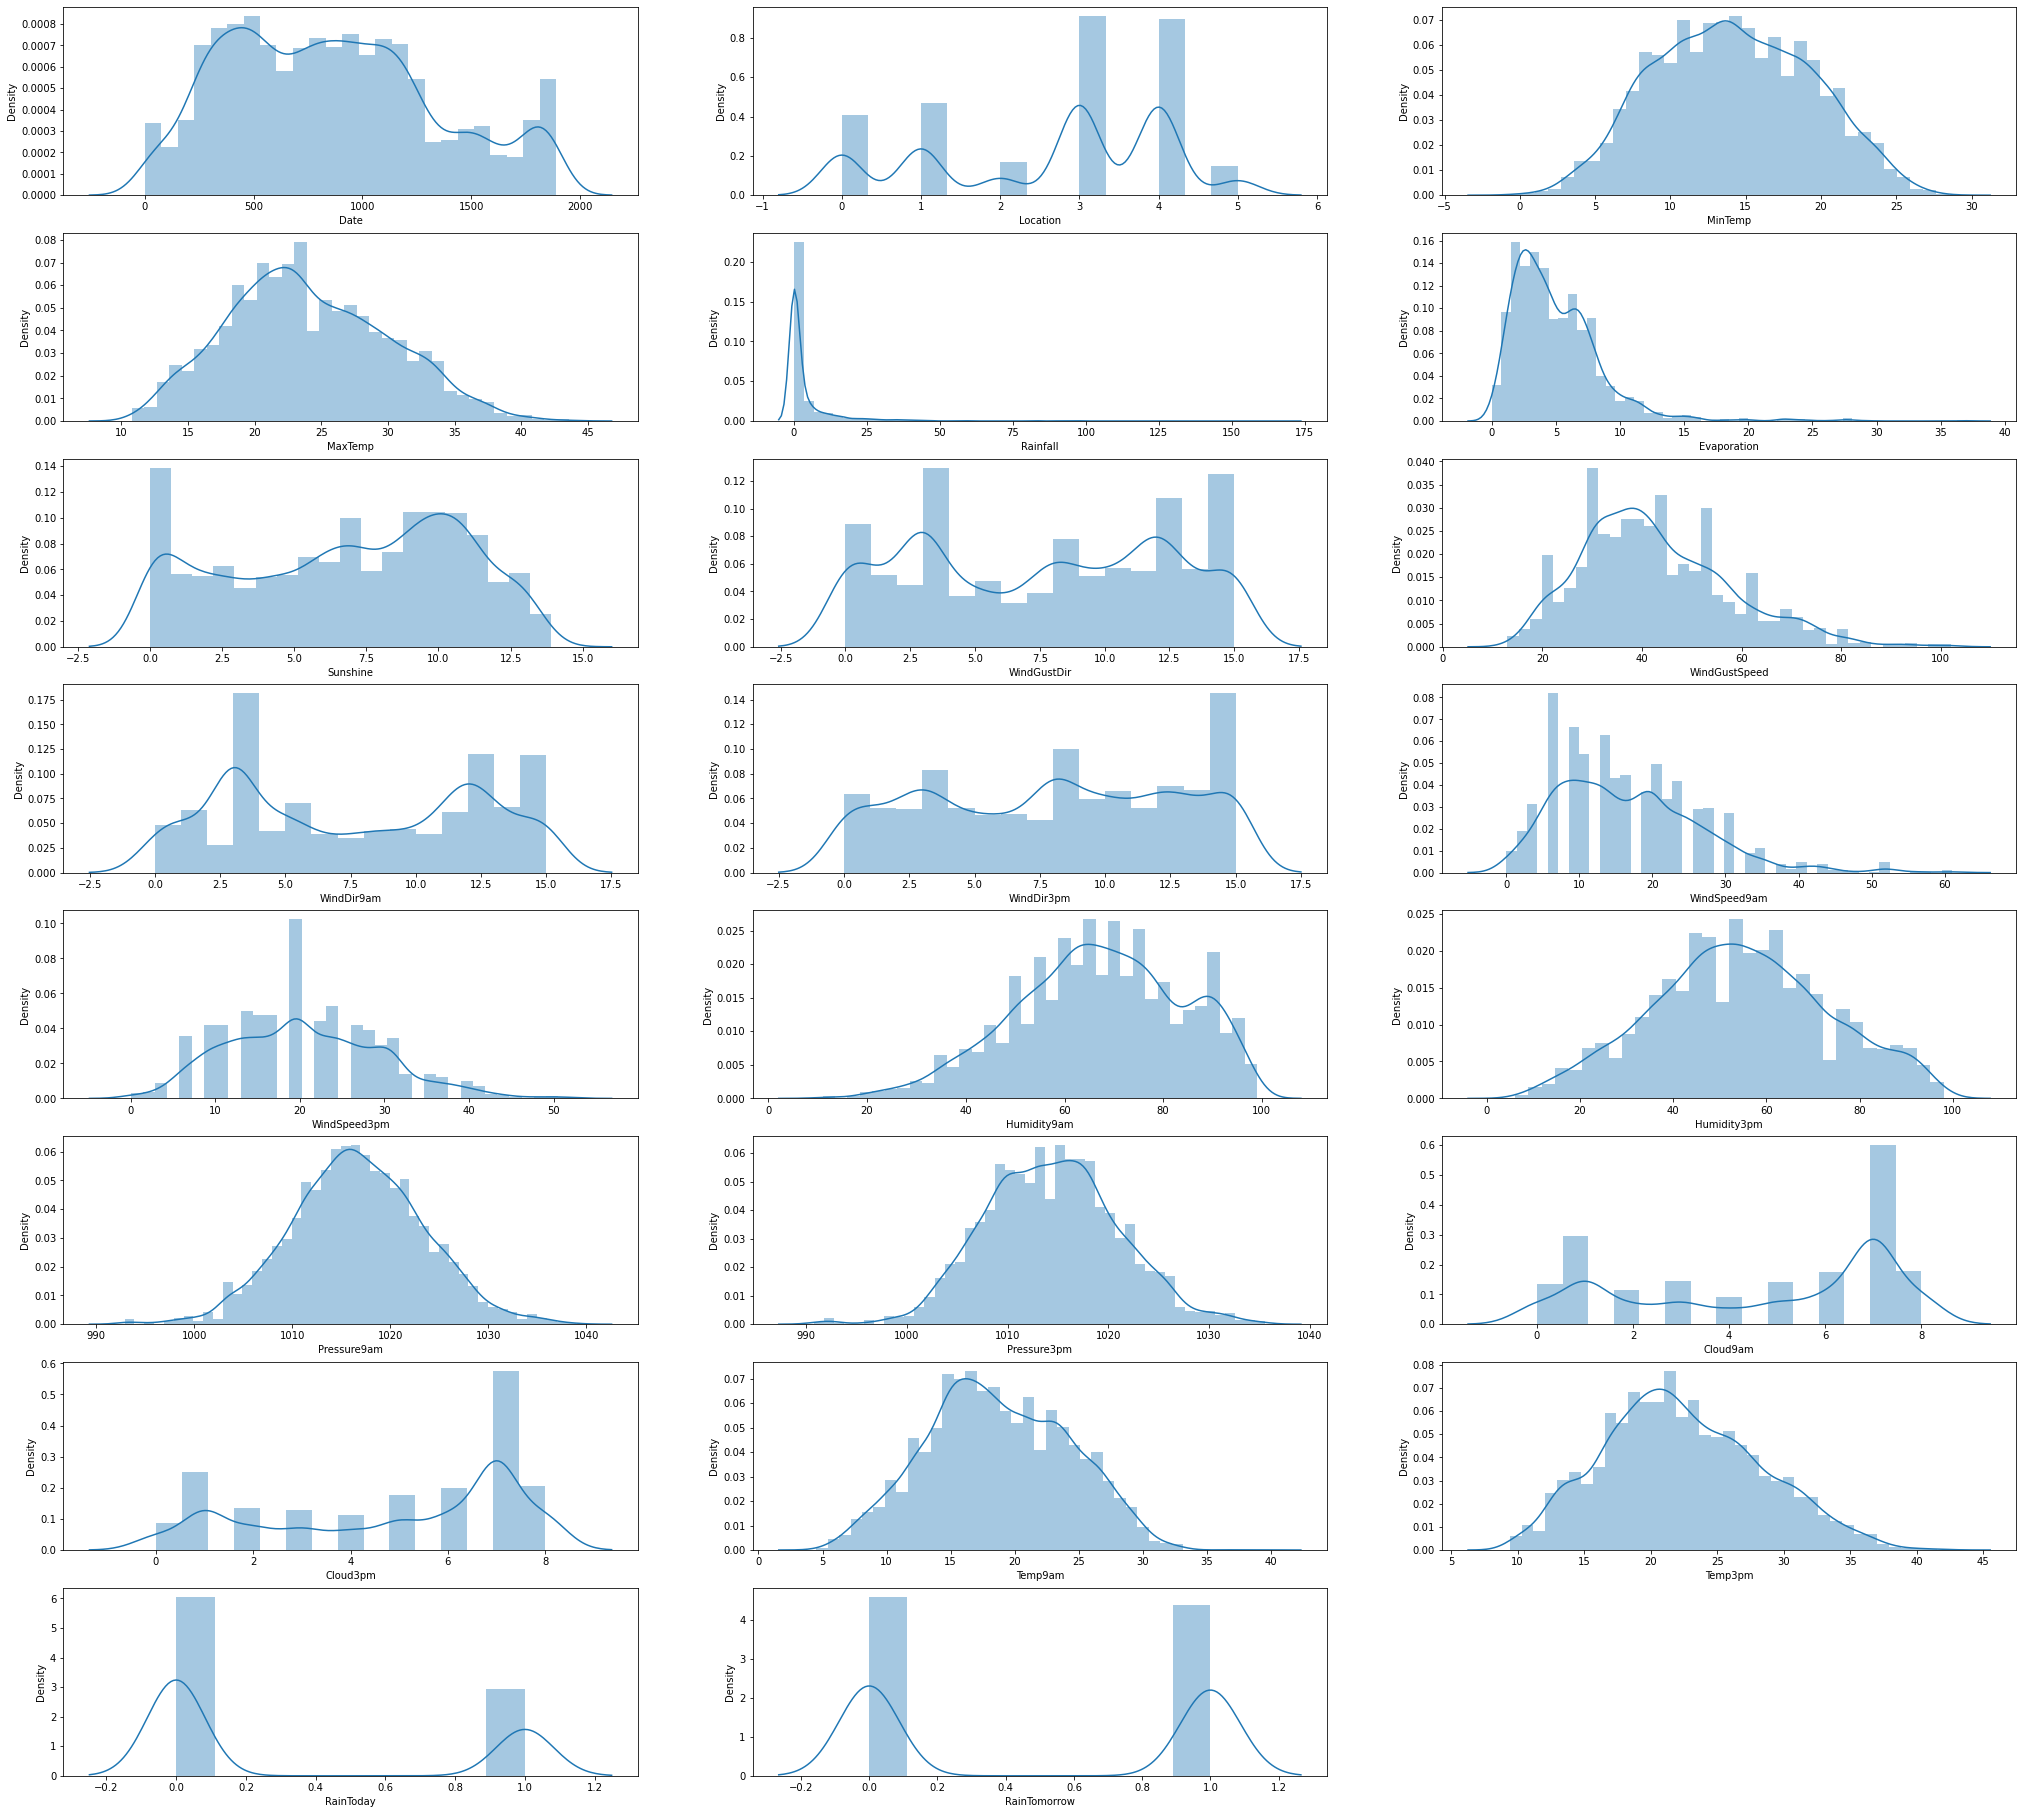

In [74]:
plt.figure(figsize=(35,45))
plotnumber =1

for column in os:
    if plotnumber <= 31:
        ax = plt.subplot(11,3,plotnumber)
        sns.distplot(os[column])
        plt.xlabel(column) 
    plotnumber+=1
plt.show()

# Lets Check the correlation 

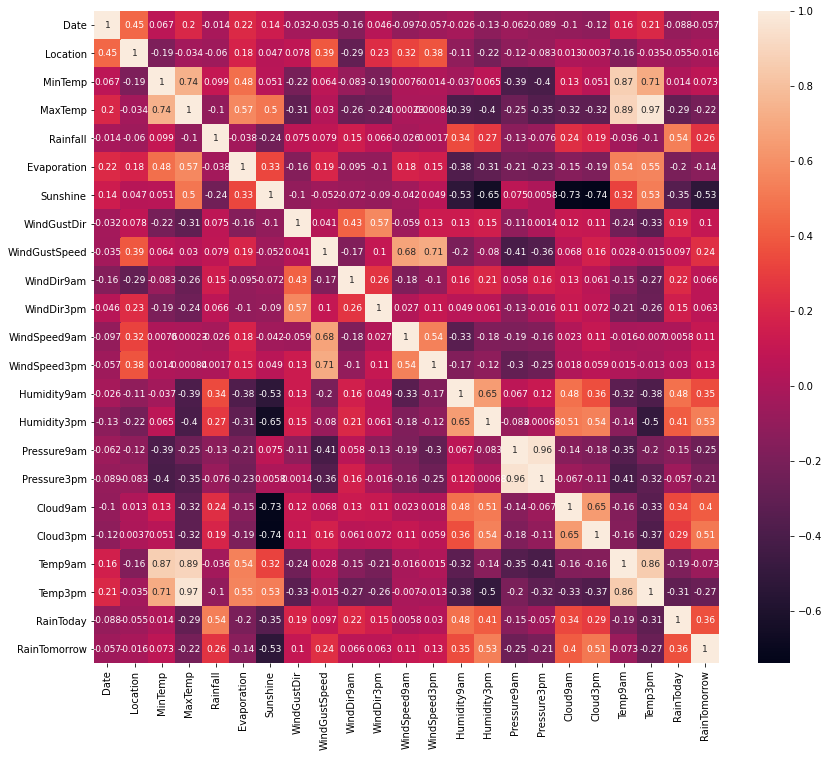

In [75]:
plt.figure(figsize=(14,12))
sns.heatmap(os.corr(),annot=True, annot_kws={"size": 9})
plt.show()

# Checking the Skewness

In [76]:
os.skew()

Date             0.378209
Location        -0.489223
MinTemp          0.055207
MaxTemp          0.277448
Rainfall         5.823966
Evaporation      2.169112
Sunshine        -0.231240
WindGustDir     -0.031140
WindGustSpeed    0.715199
WindDir9am       0.053158
WindDir3pm      -0.079535
WindSpeed9am     0.893598
WindSpeed3pm     0.345598
Humidity9am     -0.271665
Humidity3pm      0.033974
Pressure9am      0.005203
Pressure3pm      0.081766
Cloud9am        -0.421062
Cloud3pm        -0.520595
Temp9am          0.074206
Temp3pm          0.279744
RainToday        0.741718
RainTomorrow     0.046746
dtype: float64

### Using numpy.log1p() to remove the skewness nearest to 0.55

This mathematical function helps user to calculate natural logarithmic value of x+1 where x belongs to all the input array elements.

log1p is reverse of exp(x) – 1

In [77]:
features = os.drop('RainTomorrow', axis=1)
label = os['RainTomorrow']

In [78]:
for col in features:
    if os.skew().loc[col]>0.55:
        os[col] = np.log1p(os[col])

In [79]:
os.skew()

Date             0.378209
Location        -0.489223
MinTemp          0.055207
MaxTemp          0.277448
Rainfall         1.385541
Evaporation     -0.115363
Sunshine        -0.231240
WindGustDir     -0.031140
WindGustSpeed   -0.183783
WindDir9am       0.053158
WindDir3pm      -0.079535
WindSpeed9am    -1.106699
WindSpeed3pm     0.345598
Humidity9am     -0.271665
Humidity3pm      0.033974
Pressure9am      0.005203
Pressure3pm      0.081766
Cloud9am        -0.421062
Cloud3pm        -0.520595
Temp9am          0.074206
Temp3pm          0.279744
RainToday        0.741718
RainTomorrow     0.046746
dtype: float64

#### Observation- Skewness has been reduced and controlled

# Using Boxplot to check the outliers

Date                AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Location         AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
MinTemp          AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
MaxTemp          AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Rainfall         AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Evaporation      AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Sunshine         AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
WindGustDir         AxesSubplot(0.125,0.593621;0.0945122x0.130172)
WindGustSpeed    AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
WindDir9am       AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
WindDir3pm       AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
WindSpeed9am     AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
WindSpeed3pm     AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
Humidity9am      AxesSubplot(0.805488,0.593621;0.0945122x0.130172)
Humidity3pm         AxesSubplot(0.125,0.437414;0.0945122x0.130

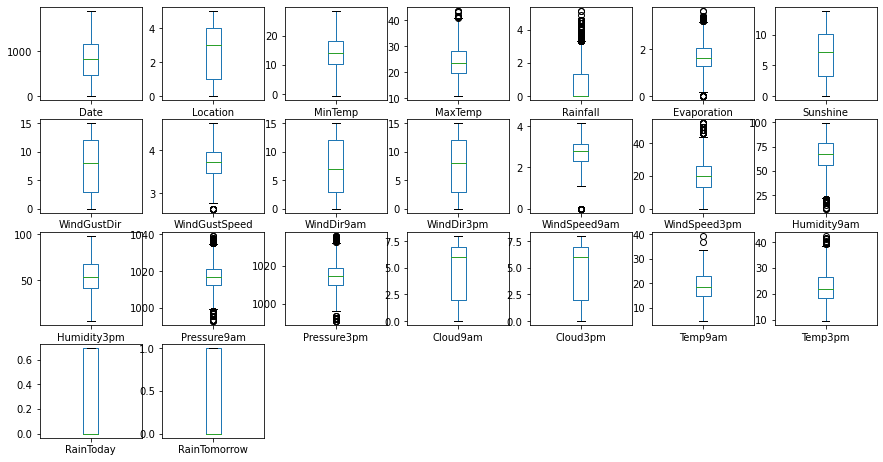

In [80]:
os.plot(kind='box',subplots=True, layout=(5,7),figsize=(15,10))

### Below columns have outliers
- MaxTemp
- Rainfall
- EVAPORATION
- WindSpeed3pm
- WindSpeed9am
- Pressure9am
- Pressure3pm
- Temp3pm

# Removing Outliers:

In [81]:
os.shape

(5779, 23)

In [82]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(os))
z.shape

(5779, 23)

In [83]:
threshold =3
print(np.where(z>3))

(array([  31,   41,   54,   66,   81,  251,  333,  392,  401,  411,  413,
        433,  440,  460,  469,  479,  481,  501,  508,  552,  595,  595,
        617,  644,  644,  692,  707,  709,  725,  725,  737,  739,  750,
        895,  895,  909,  976, 1019, 1019, 1041, 1068, 1068, 1116, 1131,
       1133, 1149, 1149, 1161, 1163, 1174, 1319, 1319, 1333, 1391, 1401,
       1415, 1434, 1438, 1450, 1451, 1457, 1583, 1643, 1685, 1688, 1700,
       1714, 1715, 1721, 1735, 1799, 1800, 1854, 1925, 1927, 1950, 1955,
       1992, 1993, 2103, 2139, 2144, 2233, 2237, 2246, 2284, 2287, 2308,
       2449, 2451, 2452, 2455, 2473, 2476, 2491, 2492, 2608, 2608, 2609,
       2609, 2609, 2726, 2962, 2986, 3022, 3022, 3023, 3023, 3026, 3041,
       3056, 3056, 3061, 3084, 3101, 3120, 3137, 3202, 3211, 3211, 3219,
       3276, 3276, 3351, 3365, 3378, 3381, 3394, 3401, 3477, 3489, 3490,
       3501, 3506, 3605, 3605, 3624, 3643, 3673, 3690, 3718, 3729, 3736,
       3740, 3747, 3789, 3795, 3795, 3845, 3856, 3

In [84]:
df_new_z=os[(z<3).all(axis=1)]
print(os.shape)
print(df_new_z.shape)

(5779, 23)
(5567, 23)


# Loss of Data

In [85]:
loss_percentage=(5779-5567)/5779*100
print(loss_percentage)

3.66845474995674


#### Observation- 3% of data has been lost to remove so much outliers

Date                AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Location         AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
MinTemp          AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
MaxTemp          AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Rainfall         AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Evaporation      AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Sunshine         AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
WindGustDir         AxesSubplot(0.125,0.593621;0.0945122x0.130172)
WindGustSpeed    AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
WindDir9am       AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
WindDir3pm       AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
WindSpeed9am     AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
WindSpeed3pm     AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
Humidity9am      AxesSubplot(0.805488,0.593621;0.0945122x0.130172)
Humidity3pm         AxesSubplot(0.125,0.437414;0.0945122x0.130

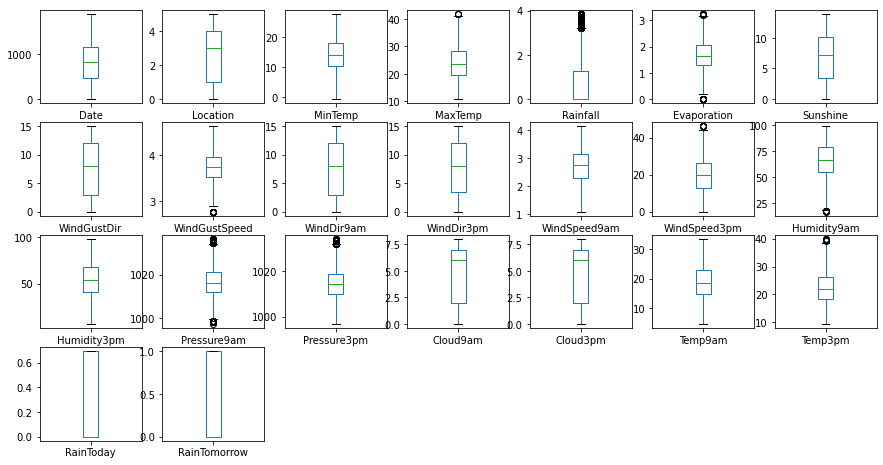

In [86]:
df_new_z.plot(kind='box',subplots=True, layout=(5,7),figsize=(15,10))

In [87]:
df_new_z.skew()

Date             0.379157
Location        -0.494790
MinTemp          0.055385
MaxTemp          0.242013
Rainfall         1.344939
Evaporation     -0.190908
Sunshine        -0.237130
WindGustDir     -0.029961
WindGustSpeed   -0.174056
WindDir9am       0.021996
WindDir3pm      -0.084636
WindSpeed9am    -0.527153
WindSpeed3pm     0.228895
Humidity9am     -0.238311
Humidity3pm      0.038462
Pressure9am      0.082537
Pressure3pm      0.188292
Cloud9am        -0.422524
Cloud3pm        -0.522687
Temp9am          0.044522
Temp3pm          0.249239
RainToday        0.772341
RainTomorrow     0.059320
dtype: float64

# Checking VIF 

In [88]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
names = list(df_new_z.drop(columns=["RainTomorrow"]))

In [89]:


for index in range(0, len(names)):
            y = df_new_z.loc[:, df_new_z.columns == names[index]]
            x = df_new_z.loc[:, df_new_z.columns != names[index]]
            model = sm.OLS(y, x)                       #Fit ordinary least squares methodhttp://localhost:8888/notebooks/baseball%20predict.ipynb#
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              names [index], (round(rsq, 2))
                    )
            )
            print("Variance Inflation Factor of {} column is {} n".format(
                 names[index], vif)
          )
            print()

R Square value of Date column is 0.28 keeping all other columns as independent features
Variance Inflation Factor of Date column is 1.39 n

R Square value of Location column is 0.91 keeping all other columns as independent features
Variance Inflation Factor of Location column is 10.65 n

R Square value of MinTemp column is 0.99 keeping all other columns as independent features
Variance Inflation Factor of MinTemp column is 72.38 n

R Square value of MaxTemp column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of MaxTemp column is 528.69 n

R Square value of Rainfall column is 0.87 keeping all other columns as independent features
Variance Inflation Factor of Rainfall column is 7.5 n

R Square value of Evaporation column is 0.96 keeping all other columns as independent features
Variance Inflation Factor of Evaporation column is 22.77 n

R Square value of Sunshine column is 0.94 keeping all other columns as independent features
Variance Inflation Fact

# Scalling the data and creating ML

- ## Predicting if tomorrow will rain or not

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [91]:
X1 = df_new_z.drop('RainTomorrow', axis=1)
y1 = df_new_z['RainTomorrow']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.2, random_state=0)

## Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
predlr = Lr.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  80.43087971274686
[[459 109]
 [109 437]]
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       568
         1.0       0.80      0.80      0.80       546

    accuracy                           0.80      1114
   macro avg       0.80      0.80      0.80      1114
weighted avg       0.80      0.80      0.80      1114



## Decision Tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Accuracy ", accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  94.16517055655295
[[512  56]
 [  9 537]]
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       568
         1.0       0.91      0.98      0.94       546

    accuracy                           0.94      1114
   macro avg       0.94      0.94      0.94      1114
weighted avg       0.94      0.94      0.94      1114



## Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  96.22980251346499
[[536  32]
 [ 10 536]]
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       568
         1.0       0.94      0.98      0.96       546

    accuracy                           0.96      1114
   macro avg       0.96      0.96      0.96      1114
weighted avg       0.96      0.96      0.96      1114



## SVC

In [95]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuracy  87.97127468581688
[[489  79]
 [ 55 491]]
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       568
         1.0       0.86      0.90      0.88       546

    accuracy                           0.88      1114
   macro avg       0.88      0.88      0.88      1114
weighted avg       0.88      0.88      0.88      1114



# Cross Validation

### Logistic Regression

In [96]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(Lr,X_scaled,y1,cv=5)
print("Cross validation score of Logistic  model :", scr.mean())

Cross validation score of Logistic  model : 0.7683018222701838


### Random Forest

In [97]:
scr = cross_val_score(rf,X_scaled,y1,cv=5)
print("Cross validation score of Random Forest  model :", scr.mean())

Cross validation score of Random Forest  model : 0.8850480932862966


### Decision Tree

In [98]:
scr = cross_val_score(dt,X_scaled,y1,cv=5)
print("Cross validation score of Random Forest  model :", scr.mean())

Cross validation score of Random Forest  model : 0.8354593420986836


### SVC 

In [99]:
scr = cross_val_score(svc,X_scaled,y1,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.7528508358053427


### Observation-
Random Forest gave us the most accuracy with highest Cross validation score as well. I will try to hyper tune the Random forest classifier


# Hyper Parameter Tuning

### Random Forest

In [100]:
from sklearn.model_selection import GridSearchCV

parameters= {'max_features' : ['auto','sqrt','log2'],
             'criterion': ['gini','entropy']}

In [101]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) 
GCV.best_params_


{'criterion': 'gini', 'max_features': 'auto'}

In [102]:
GCV_pred= GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9622980251346499

# ROC AUC Plot

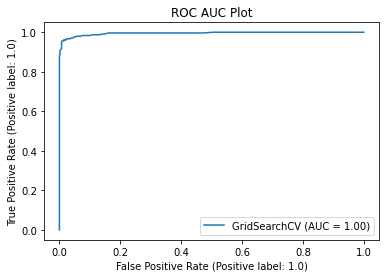

In [103]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

### AUC score is #99

# Conslusion

In [104]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.best_estimator_.predict(x_test))
data_com = pd.DataFrame({"Original": a,"Predicted":predicted},index = range(len(a)))
data_com.head(15)

,Original,Predicted
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
7,0.0,0.0
8,1.0,1.0
9,0.0,0.0


# Saving the Model for if rainfall will hapeen tomorrow or not

In [105]:
import pickle
filename = 'rainfall_tomorrow_prediction.pkl'
pickle.dump(GCV,open(filename, 'wb'))

In [106]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X1 = df_new_z.drop('Rainfall', axis=1)
y1 = df_new_z['Rainfall']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.3, random_state=0)

### Linear Regression

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.8096
Test Score : 0.8082


 ### Ridge

In [108]:
model = Ridge()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.8096
Test Score : 0.8082


### Gradient Boost

In [109]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9026
Test Score : 0.8837


### K-Nearest Neighbors

In [110]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9198
Test Score : 0.8579


### Random Forest

In [111]:
model = RandomForestRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9930
Test Score : 0.9492


### Decision Tree

In [112]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 1.0000
Test Score : 0.9169


# Hyperparameter Tuning

In [113]:
from sklearn.model_selection import GridSearchCV

models = []
scores = []

### Ridge

In [114]:
param_grid = {'alpha' : [0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
model = Ridge()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
ridge_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(ridge_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Ridge')
scores.append(ridge_score)

Test Score : 0.8082
Best Parameters : {'alpha': 1}
Best CV Score : 0.8062


### Gradient Boost

In [115]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9,10,11,12]}
model = GradientBoostingRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test, y_test)
  

print('Test Score : {:.4f}'.format(gb_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Gradient Boost')
scores.append(gb_score)

Test Score : 0.9476
Best Parameters : {'max_depth': 9}
Best CV Score : 0.9398


### K-Nearest Neighbors

In [116]:
param_grid = {'n_neighbors' : range(1, 20)}
model = KNeighborsRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
knr_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(knr_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('K-Nearest Neighbors')
scores.append(knr_score)

Test Score : 0.9011
Best Parameters : {'n_neighbors': 1}
Best CV Score : 0.8941


### Random Forest

In [117]:
param_grid = {'max_depth' : [5, 10, 15, 20, 25, 30]}
model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
rf_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(rf_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Random Forest')
scores.append(rf_score)

Test Score : 0.9460
Best Parameters : {'max_depth': 15}
Best CV Score : 0.9360


### Decision Tree

In [118]:
am_grid = {'max_depth' : range(2, 20), "min_samples_leaf" : range(2, 10)}
model = DecisionTreeRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
dt_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(dt_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Decision Tree')
scores.append(dt_score)

Test Score : 0.9222
Best Parameters : {'max_depth': 25}
Best CV Score : 0.9029


### Result

In [119]:
df_result = pd.DataFrame({'Model' : models, 'Score' : scores})
df_result

,Model,Score
0,Ridge,0.808195
1,Gradient Boost,0.947607
2,K-Nearest Neighbors,0.901068
3,Random Forest,0.946028
4,Decision Tree,0.922221


### Random Forest gave the highest accuracy 

In [120]:
param_grid = {'max_depth' : [5, 10, 15, 20, 25, 30]}
model = RandomForestRegressor()

grid_search_final = GridSearchCV(model, param_grid, cv=5)
grid_search_final.fit(X_train, y_train)
rf_score = grid_search_final.score(X_test, y_test)

print('Test Score : {:.4f}'.format(rf_score))
print('Best Parameters :', grid_search_final.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search_final.best_score_))

Test Score : 0.9456
Best Parameters : {'max_depth': 30}
Best CV Score : 0.9368


# Lets visualize the actual vs predicted result

In [121]:
predict = grid_search_final.predict(X_test)

In [122]:
predict

array([0.18232156, 1.7560267 , 0.0110658 , ..., 0.0570567 , 0.00364643,
       0.04015986])

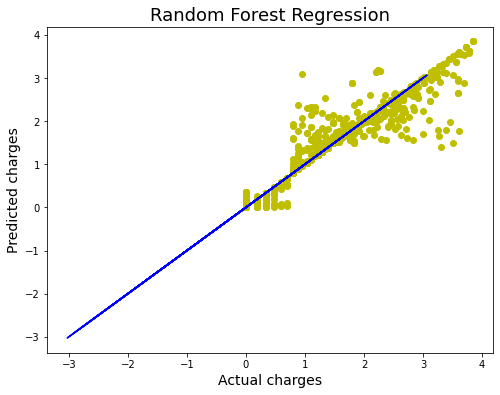

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predict,color='y')
plt.plot(X_test,X_test,color='b')
plt.xlabel('Actual charges',fontsize= 14)
plt.ylabel('Predicted charges',fontsize= 14)
plt.title('Random Forest Regression',fontsize= 18)
plt.show()

In [128]:
import pickle
filename = 'rainfall_amount_prediction.pkl'
pickle.dump(grid_search_final,open(filename, 'wb'))